In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [2]:
kijkcijfers = pd.read_csv('./data/processed/tv_kijkcijfers_weer.csv')

kijkcijfers.head()

,date,program,channel,startTime,duration,viewers,live,hour,temperature,weather_code,precipitation,rain,snowfall,cloudcover,windspeed
0,2016-10-01,HET 7 UUR-JOURNAAL,EEN,19:00:05,1898.0,721850,0,19,13.9,53.0,0.5,0.5,0.0,27.0,13.8
1,2016-10-01,FC DE KAMPIOENEN,EEN,20:41:00,2319.0,709606,0,20,12.8,1.0,0.0,0.0,0.0,24.0,14.9
2,2016-10-01,WEG ZIJN WIJ,EEN,20:13:36,1484.0,548239,0,20,12.8,1.0,0.0,0.0,0.0,24.0,14.9
3,2016-10-01,IEDEREEN BEROEMD,EEN,19:38:10,1741.0,523610,0,19,13.9,53.0,0.5,0.5,0.0,27.0,13.8
4,2016-10-01,COMEDY TOPPERS,VTM,19:52:06,1480.0,496216,0,19,13.9,53.0,0.5,0.5,0.0,27.0,13.8


Info over data

In [3]:
kijkcijfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60528 entries, 0 to 60527
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           60528 non-null  object 
 1   program        60528 non-null  object 
 2   channel        60528 non-null  object 
 3   startTime      60528 non-null  object 
 4   duration       60528 non-null  float64
 5   viewers        60528 non-null  int64  
 6   live           60528 non-null  int64  
 7   hour           60528 non-null  int64  
 8   temperature    60508 non-null  float64
 9   weather_code   60508 non-null  float64
 10  precipitation  60508 non-null  float64
 11  rain           60508 non-null  float64
 12  snowfall       60508 non-null  float64
 13  cloudcover     60508 non-null  float64
 14  windspeed      60508 non-null  float64
dtypes: float64(8), int64(3), object(4)
memory usage: 6.9+ MB


Statistieken

In [4]:
kijkcijfers.describe()

,duration,viewers,live,hour,temperature,weather_code,precipitation,rain,snowfall,cloudcover,windspeed
count,60528.000000,6.052800e+04,60528.000000,60528.000000,60508.000000,60508.000000,60508.000000,60508.000000,60508.000000,60508.000000,60508.000000
mean,2682.629064,4.460521e+05,2.763680,18.607124,12.195606,11.522427,0.094406,0.091474,0.002053,66.226003,14.388273
std,1758.600994,2.781791e+05,7.205886,2.925732,7.011301,20.247263,0.380044,0.373957,0.040018,38.317015,7.467515
min,900.000000,1.588700e+04,0.000000,0.000000,-6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1566.000000,2.298930e+05,0.000000,18.000000,7.000000,1.000000,0.000000,0.000000,0.000000,30.000000,8.600000
50%,2361.000000,3.602595e+05,0.000000,19.000000,11.700000,3.000000,0.000000,0.000000,0.000000,88.000000,13.000000
75%,3064.000000,6.061555e+05,0.000000,20.000000,17.500000,3.000000,0.000000,0.000000,0.000000,100.000000,18.800000
max,35359.000000,2.494114e+06,28.000000,23.000000,38.300000,75.000000,13.800000,13.800000,2.170000,100.000000,57.400000


## Controleren op ontbrekende waarden

Er ontbreekt weerdata voor de recentste datums => verwijder deze rijen

In [5]:
kijkcijfers[kijkcijfers.isnull().any(axis=1)]

,date,program,channel,startTime,duration,viewers,live,hour,temperature,weather_code,precipitation,rain,snowfall,cloudcover,windspeed
60508,2025-02-25,HET 7 UUR-JOURNAAL,VRT 1,19:00:05,2874.0,953451,0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60509,2025-02-25,THUIS,VRT 1,20:22:23,1492.0,935844,0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60510,2025-02-25,MAN BIJT HOND,VRT 1,19:50:40,1370.0,793175,0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60511,2025-02-25,FACTCHECKERS,VRT 1,20:47:39,2685.0,756078,0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60512,2025-02-25,DE DAG VAN VANDAAG,VRT 1,21:34:56,3209.0,667498,0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60513,2025-02-25,NIEUWS 19U VTM,VTM,18:59:48,3164.0,620880,0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60514,2025-02-25,BLOKKEN,VRT 1,18:28:02,1706.0,603243,0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60515,2025-02-25,FAMILIE,VTM,20:04:47,1541.0,467302,0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60516,2025-02-25,HET 1 UUR-JOURNAAL,VRT 1,13:00:04,1593.0,434329,0,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60517,2025-02-25,DAGELIJKSE KOST,VRT 1,18:10:08,913.0,355330,0,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
kijkcijfers.dropna(inplace=True)

In [14]:
unique_programs = kijkcijfers['live'].unique()
unique_programs.size

4

## Visualitatie

Histogrammen

live, weather_code, channel => categoricals

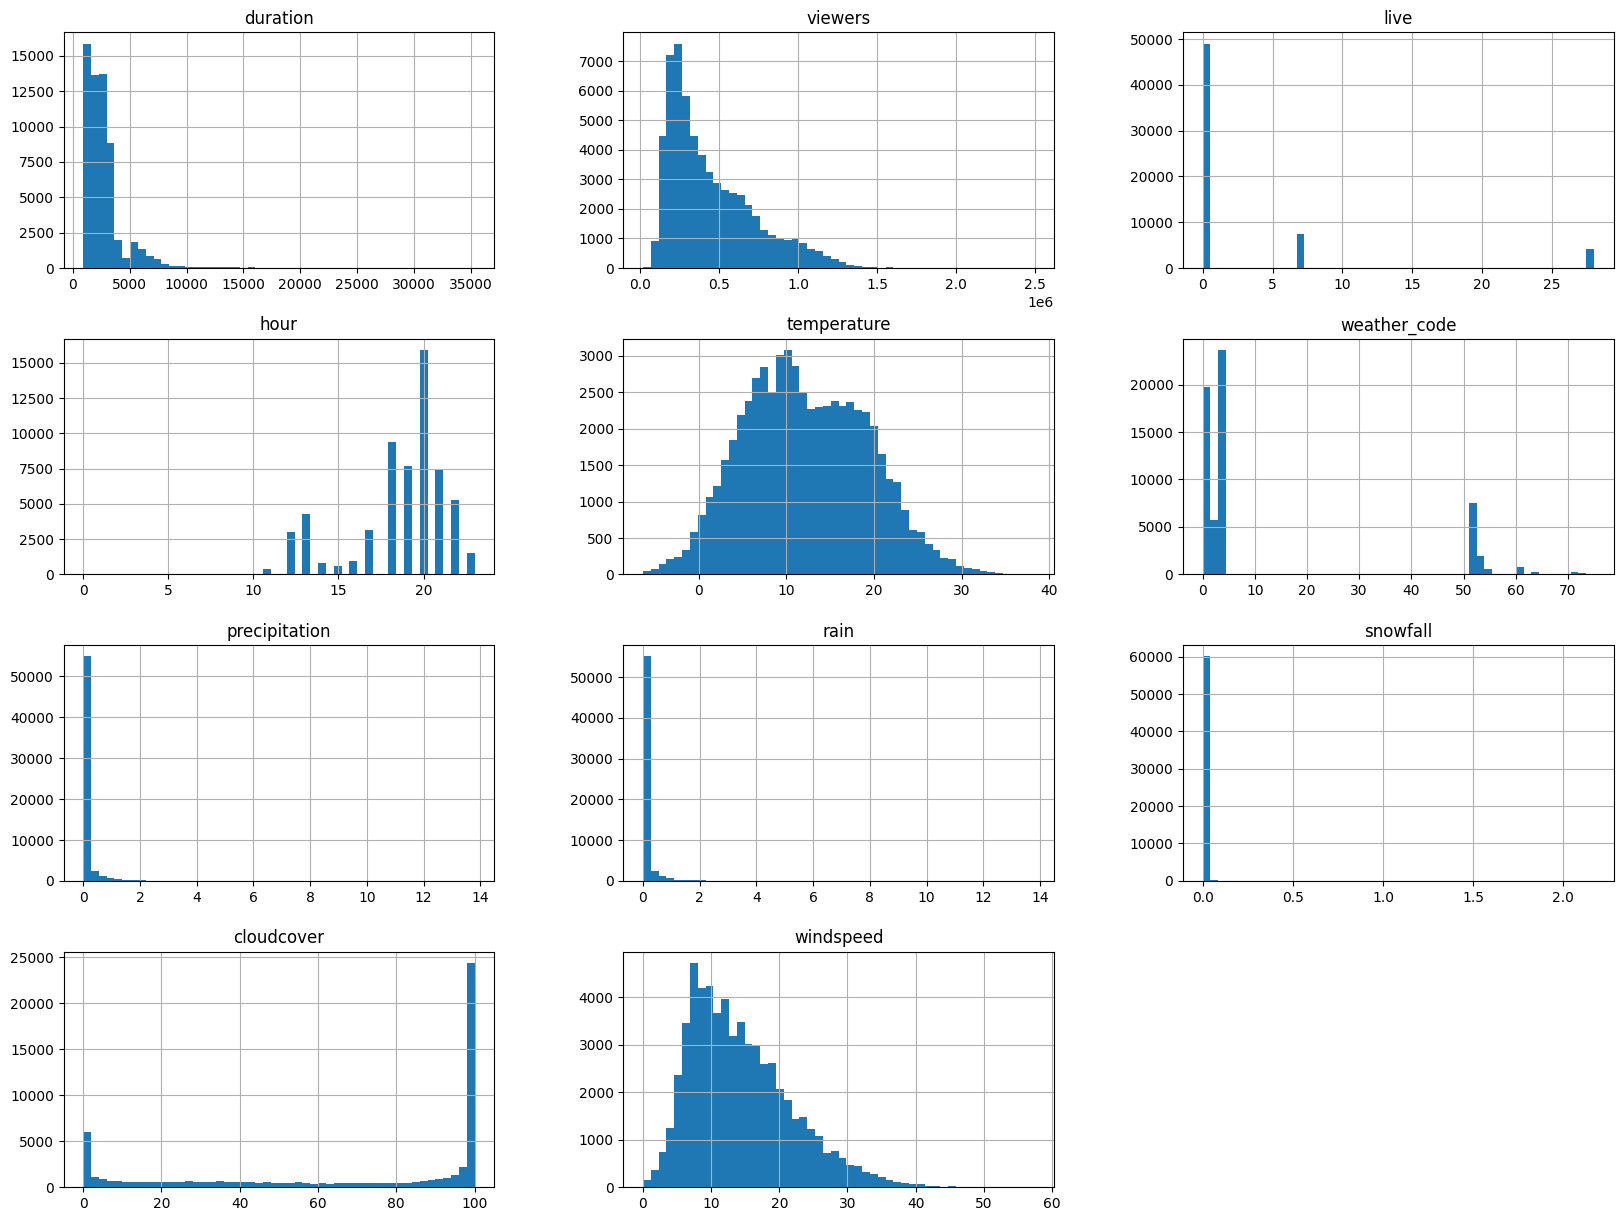

In [7]:
kijkcijfers.hist(bins=50, figsize=(20,15))
plt.show()

Correlatiematrix visualisatie

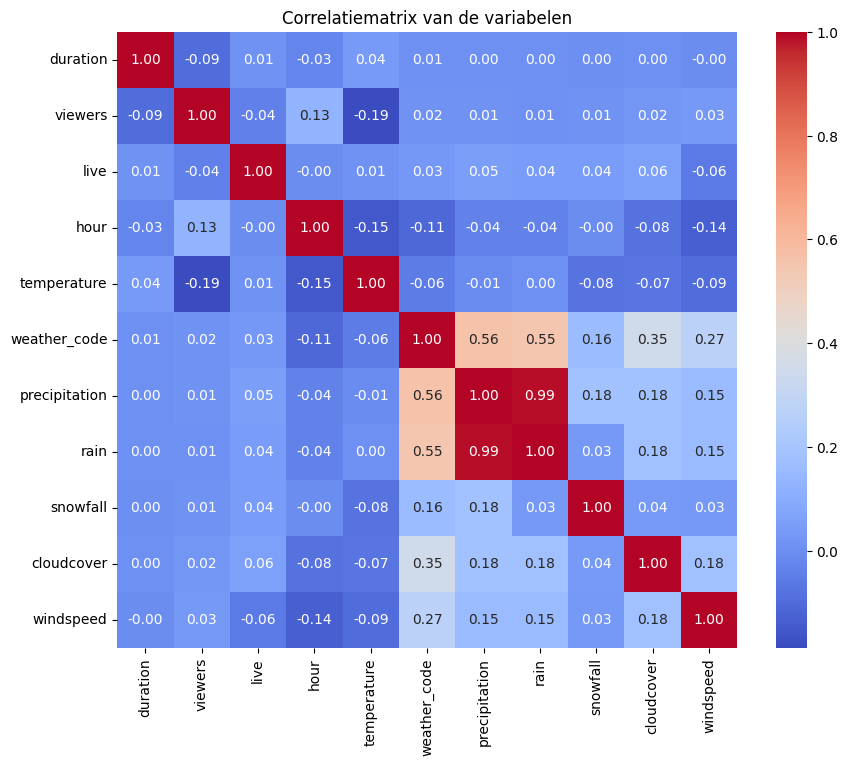

In [8]:
kijkcijfers_num = kijkcijfers.select_dtypes(include=[np.number])
corr_matrix = kijkcijfers_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlatiematrix van de variabelen")
plt.show()

In [9]:
corr_matrix["viewers"].sort_values(ascending=False)

viewers          1.000000
hour             0.125685
windspeed        0.031959
cloudcover       0.021998
weather_code     0.015305
snowfall         0.011399
precipitation    0.009152
rain             0.007556
live            -0.042719
duration        -0.094682
temperature     -0.187035
Name: viewers, dtype: float64

array([[<Axes: xlabel='viewers', ylabel='viewers'>,
        <Axes: xlabel='temperature', ylabel='viewers'>,
        <Axes: xlabel='rain', ylabel='viewers'>,
        <Axes: xlabel='hour', ylabel='viewers'>,
        <Axes: xlabel='duration', ylabel='viewers'>],
       [<Axes: xlabel='viewers', ylabel='temperature'>,
        <Axes: xlabel='temperature', ylabel='temperature'>,
        <Axes: xlabel='rain', ylabel='temperature'>,
        <Axes: xlabel='hour', ylabel='temperature'>,
        <Axes: xlabel='duration', ylabel='temperature'>],
       [<Axes: xlabel='viewers', ylabel='rain'>,
        <Axes: xlabel='temperature', ylabel='rain'>,
        <Axes: xlabel='rain', ylabel='rain'>,
        <Axes: xlabel='hour', ylabel='rain'>,
        <Axes: xlabel='duration', ylabel='rain'>],
       [<Axes: xlabel='viewers', ylabel='hour'>,
        <Axes: xlabel='temperature', ylabel='hour'>,
        <Axes: xlabel='rain', ylabel='hour'>,
        <Axes: xlabel='hour', ylabel='hour'>,
        <Axes: xlabel

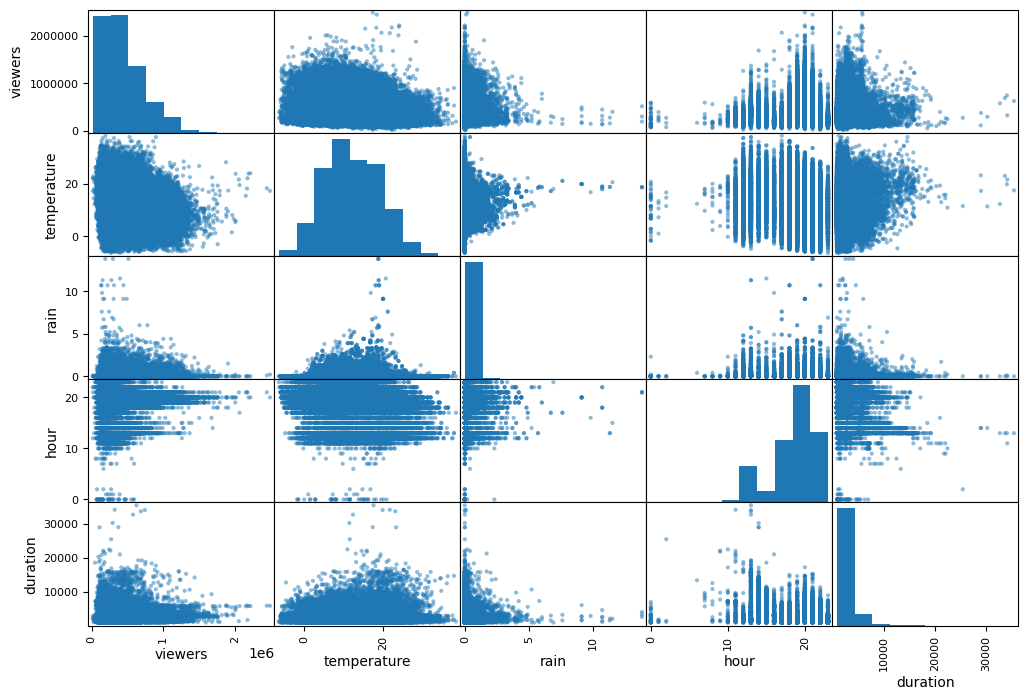

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["viewers", "temperature", "rain", "hour", "duration"]
scatter_matrix(kijkcijfers[attributes], figsize=(12, 8))